<a href="https://colab.research.google.com/github/KirolosAyman/Customer_Segmentation_using_K_Means_Clustering/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/Mall_Customers.csv')

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

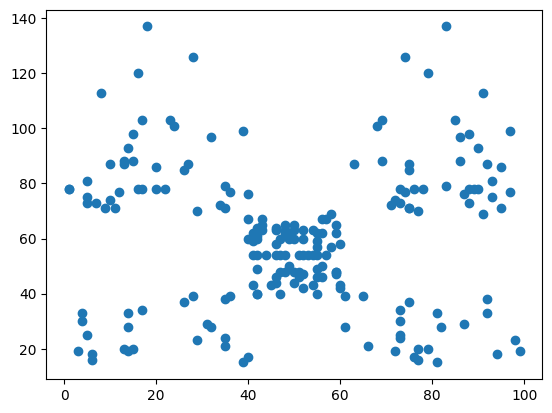

In [ ]:
plt.scatter(customer_data["Spending Score (1-100)"] , customer_data["Annual Income (k$)"])
plt.show()

*Choosing* the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [ ]:
WCSS = []
clusters = range(1,10)
for i in clusters:
    model = KMeans(n_clusters = i , init='k-means++' , n_init=100)
    model.fit(customer_data[["Spending Score (1-100)" , "Annual Income (k$)"]])
    WCSS.append(model.inertia_)

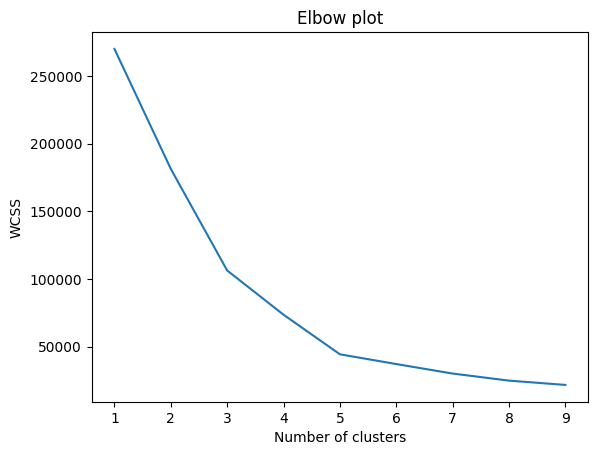

In [ ]:
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow plot")
plt.plot(clusters , WCSS)

Elbow plot has indentified that 5 groups clustering is the best way for clustering data



Optimum Number of Clusters = 5

In [ ]:
model = KMeans(n_clusters = 5, init='k-means++',n_init=100)

y_predicted  = model.fit_predict(customer_data[["Spending Score (1-100)" , "Annual Income (k$)"]])

y_predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

add col Group to the data


In [ ]:
customer_data["Group"] = y_predicted

In [ ]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


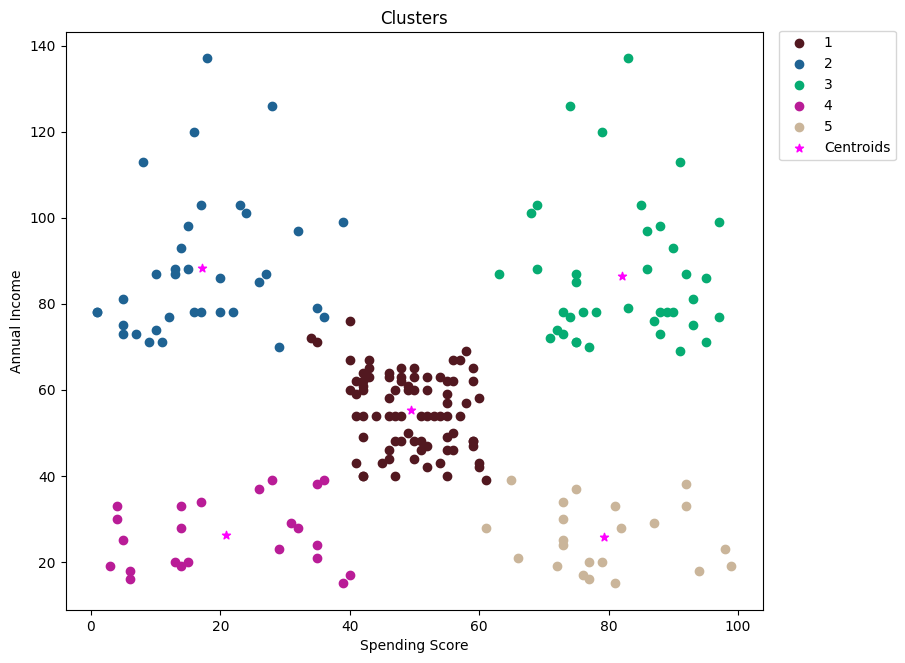

In [ ]:
df1=  customer_data[customer_data.Group == 0]
df2=  customer_data[customer_data.Group == 1]
df3=  customer_data[customer_data.Group == 2]
df4=  customer_data[customer_data.Group == 3]
df5=  customer_data[customer_data.Group == 4]
plt.figure(figsize = (9,7.5))
plt.scatter(df1["Spending Score (1-100)"] , df1["Annual Income (k$)"]  , color = "#521820" , label = "1")
plt.scatter(df2["Spending Score (1-100)"] , df2["Annual Income (k$)"]  , color = "#1f6393" , label = "2")
plt.scatter(df3["Spending Score (1-100)"] , df3["Annual Income (k$)"] , color = "#06ac72" , label = "3")
plt.scatter(df4["Spending Score (1-100)"] , df4["Annual Income (k$)"], color = "#b91c97" , label = "4")
plt.scatter(df5["Spending Score (1-100)"] , df5["Annual Income (k$)"] , color = "#cab59a" , label = "5")
plt.scatter(model.cluster_centers_[: , 0] ,  model.cluster_centers_[: , 1] , color = "magenta" , marker = "*"  , label =  "Centroids")
plt.legend(loc='upper right'  , bbox_to_anchor=(1.20, 1.015))
plt.title("Clusters")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()